In [118]:
# Imports
import sys
from neuron_readExportedGeometry import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [119]:
# Set Up the Geo Object
geo = demoReadsilent('/home/user/878_043_GM_scaled.hoc')
                        #Directory of the neuron hoc file

Number of subgraphs = 3 / size of graphs: [35, 36, 844]
Removed all but largest subgraphs
Soma is filament_999[0].
7 axons are:
['filament_999[431]', 'filament_999[779]', 'filament_999[760]', 'filament_999[680]', 'filament_999[220]', 'filament_999[875]', 'filament_999[20]']
From soma to tips, tortuosity is 1.6 +- 0.9


In [120]:
# Find and index the tips
tips, ends = geo.getTips()
# tipInds, tipEnds = geo.getTipIndices() Why use this?

# geo.getProperties(display=True, makePlots=True) For posterity

Soma is filament_999[0].
7 axons are:
['filament_999[431]', 'filament_999[779]', 'filament_999[760]', 'filament_999[680]', 'filament_999[220]', 'filament_999[875]', 'filament_999[20]']


In [121]:
# Calculate path distance to each tip
pDF = PathDistanceFinder(geo, geo.soma)
pdists = [pDF.distanceTo(seg) for seg in tips]

In [122]:
# Calculate Euclidean distance to each tip
def euc(pt0, pt1): # Function lifted from Alex's code
    return np.sqrt(sum([(pt1[i]-pt0[i])**2 for i in range(3)]))

somacoord = geo.soma.coordAt(0)
coords = [tips[i].coordAt(ends[i]) for i in range(len(tips))]
edists = [euc(somacoord, coords[i]) for i in range(len(tips))]

In [123]:
# Calculate tortuosity for each tip
torts = [pdists[i]/edists[i] for i in range(len(tips))]

845

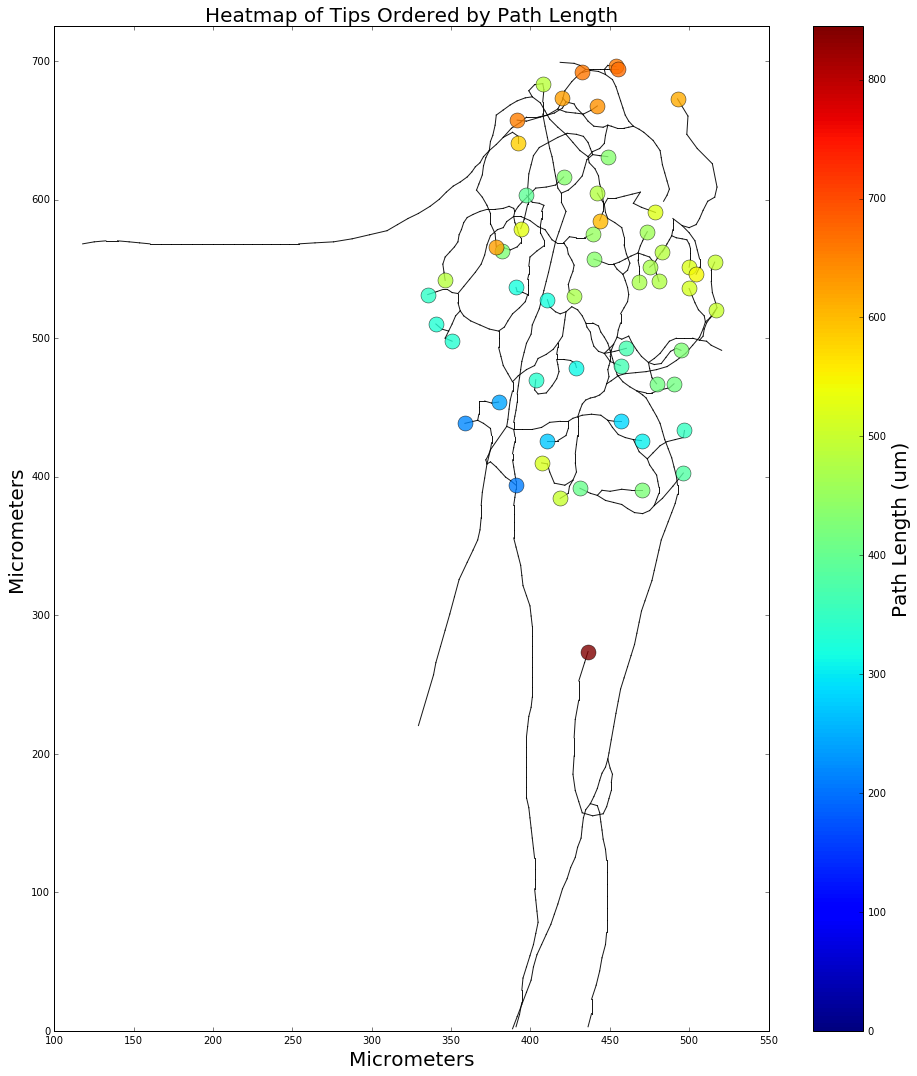

In [208]:
# Build skeleton
plt.figure(figsize=(16,18))
bpts = []
for b in geo.branches:
    bpts.append([[n.x, n.y] for n in b.nodes])
for b in bpts:
    for c in range(len(b)-1):
        plt.plot([b[c][0], b[c+1][0]], 
                 [b[c][1], b[c+1][1]], color='k', alpha=0.9)

# Plot points colored by path distance
maxDist = max(pdists)
tfloats = [float(i)/maxDist for i in pdists]
tcolors = plt.cm.jet(tfloats)
cmap = plt.cm.jet
for t in range(len(coords)):
    plt.plot(coords[t][0], coords[t][1], 'o', color=tcolors[t],
             alpha=0.8, mec='k', ms=15)
    
# Add colorbar
sc = []
sc.append(plt.scatter([0,0], [0,0], c=[0., 1.], s=0.1,
                      vmin=0, vmax=maxDist, cmap=cmap))
cbar = plt.colorbar(sc[-1])
    
# Add labels
plt.xlabel('Micrometers', fontsize=20)
plt.xlim([100, 550])
plt.ylabel('Micrometers', fontsize=20)
plt.ylim([0, 725])
plt.title('Heatmap of Tips Ordered by Path Length', fontsize=20)
cbar.set_label("Path Length (um)", fontsize=20)

# Does bpts truly contain all nodes? If so, returns true.
def bptsCheck(geof, bptsf):
    bptsLen = [len(n) for n in bptsf]
    gbLen = [len(b.nodes) for b in geof.branches]
    return sum(bptsLen) == sum(gbLen)

Soma is filament_999[0].
7 axons are:
['filament_999[431]', 'filament_999[779]', 'filament_999[760]', 'filament_999[680]', 'filament_999[220]', 'filament_999[875]', 'filament_999[20]']
True, there are 963 nodes in bpts and 963 nodes in geo.branches[i].


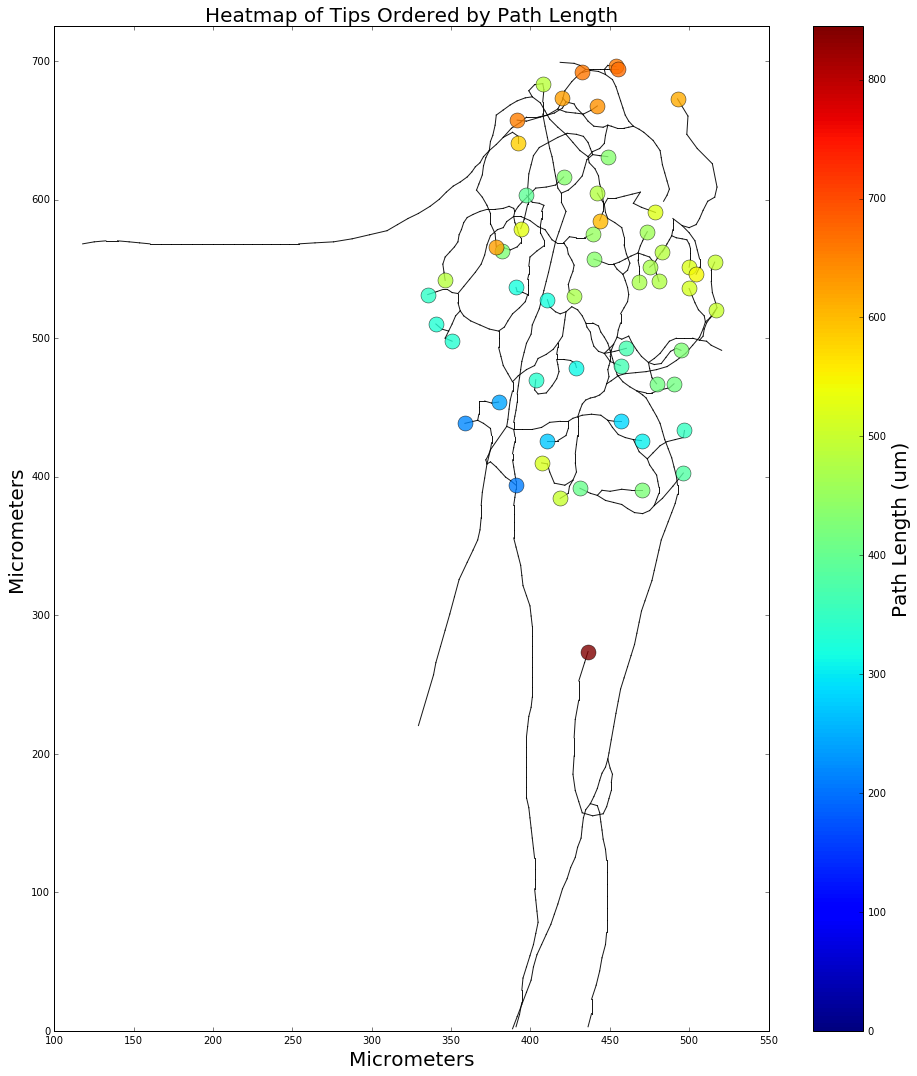

In [217]:
def pathPlot(geo):
    # Find the tips and their ends
    tips, ends = geo.getTips()
    
    # Calculate path distance to each tip
    pDF = PathDistanceFinder(geo, geo.soma)
    pdists = [pDF.distanceTo(seg) for seg in tips]
    
    # Build skeleton
    plt.figure(figsize=(16,18))
    bpts = []
    for b in geo.branches:
        bpts.append([[n.x, n.y] for n in b.nodes])
    for b in bpts:
        for c in range(len(b)-1):
            plt.plot([b[c][0], b[c+1][0]], 
                     [b[c][1], b[c+1][1]], color='k', alpha=0.9)

    # Plot points colored by path distance
    maxDist = max(pdists)
    tfloats = [float(i)/maxDist for i in pdists]
    tcolors = plt.cm.jet(tfloats)
    cmap = plt.cm.jet
    for t in range(len(coords)):
        plt.plot(coords[t][0], coords[t][1], 'o', color=tcolors[t],
                 alpha=0.8, mec='k', ms=15)
    
    # Add colorbar
    sc = []
    sc.append(plt.scatter([0,0], [0,0], c=[0., 1.], s=0.1,
                      vmin=0, vmax=maxDist, cmap=cmap))
    cbar = plt.colorbar(sc[-1])
    
    # Add labels
    plt.xlabel('Micrometers', fontsize=20)
    plt.xlim([100, 550])
    plt.ylabel('Micrometers', fontsize=20)
    plt.ylim([0, 725])
    plt.title('Heatmap of Tips Ordered by Path Length', fontsize=20)
    cbar.set_label("Path Length (um)", fontsize=20)

    # Does bpts truly contain all nodes? If so, returns true.
    bptsLen = [len(n) for n in bpts]
    gbLen = [len(b.nodes) for b in geo.branches]
    check = sum(bptsLen) == sum(gbLen)
    print("{}, there are {} nodes in bpts and {} nodes in geo.branches[i].".format(check, sum(bptsLen), sum(gbLen)))
    
pathPlot(geo)